In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv', sep=',')
print(df.head(5))
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

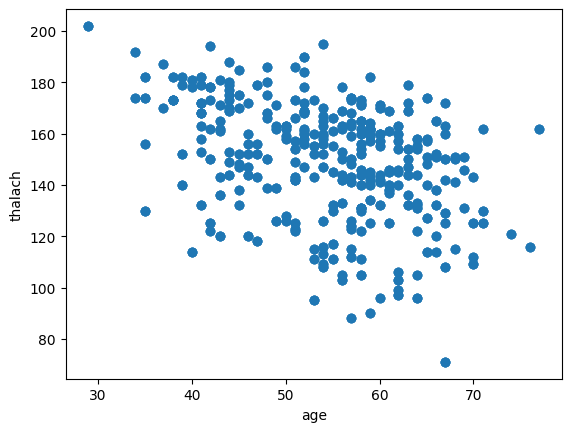

In [4]:
# Диаграмма рассеяния

plt.xlabel('age')
plt.ylabel('thalach')
plt.scatter(x=df['age'], y=df['thalach'])

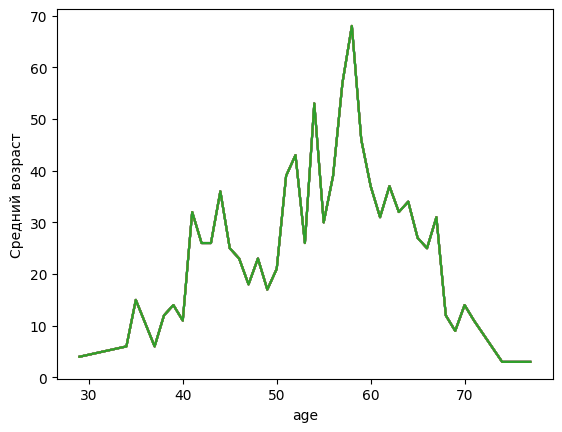

In [5]:
# Линейный гарфик

d = df.groupby(['age']).count()
plt.xlabel('age')
plt.ylabel('Средний возраст')
plt.plot(d.index, d.values)

{'whiskers': [<matplotlib.lines.Line2D at 0x14f41119f50>,
 'caps': [<matplotlib.lines.Line2D at 0x14f411b5190>,
 'boxes': [<matplotlib.patches.PathPatch at 0x14f411a72d0>],
 'medians': [<matplotlib.lines.Line2D at 0x14f411b6890>],
 'fliers': [<matplotlib.lines.Line2D at 0x14f411b7f50>],
 'means': [<matplotlib.lines.Line2D at 0x14f411b7410>]}

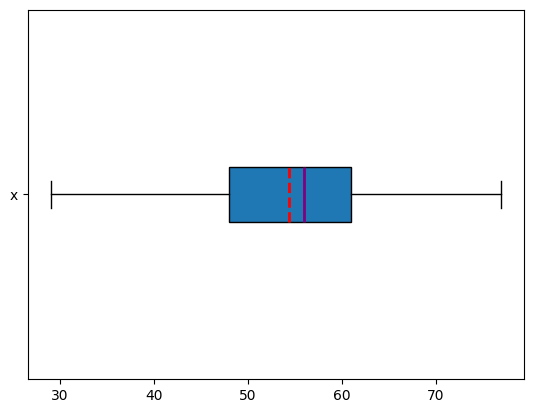

In [6]:
# Ящик с усами

plt.boxplot(x=df['age'], vert=False, showmeans=True, meanline=True,
labels=('x'), patch_artist=True, medianprops={'linewidth': 2, 'color':
'purple'}, meanprops={'linewidth': 2, 'color': 'red'})

(array([0.00081301, 0.00792683, 0.02215447, 0.0254065 , 0.02439024,
        0.04166667, 0.0445122 , 0.03028455, 0.00934959, 0.00182927]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

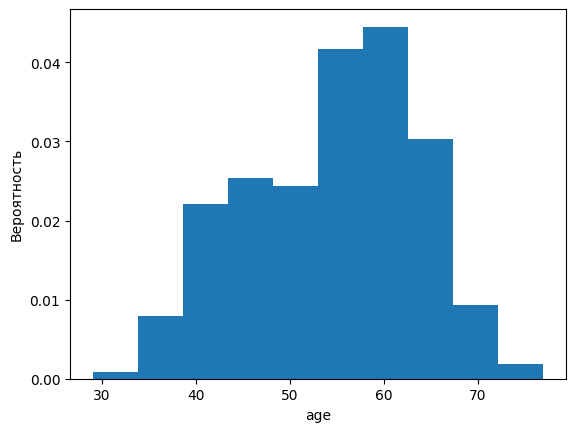

In [7]:
# Гистограмма

plt.xlabel('age')
plt.ylabel('Вероятность')
plt.hist(x=df['age'], bins=10, density=True)

array([<Axes: >], dtype=object)

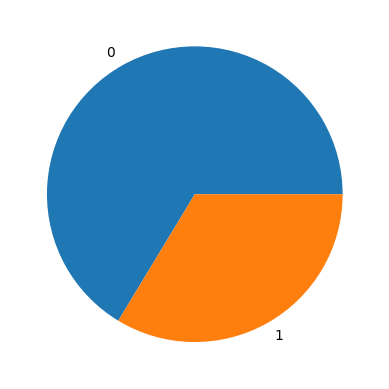

In [8]:
# Круговые диаграммы

d = df.groupby('exang', sort=True).size().sort_values(ascending = False)
#строим график
d.plot(kind='pie', subplots=True)

<BarContainer object of 2 artists>

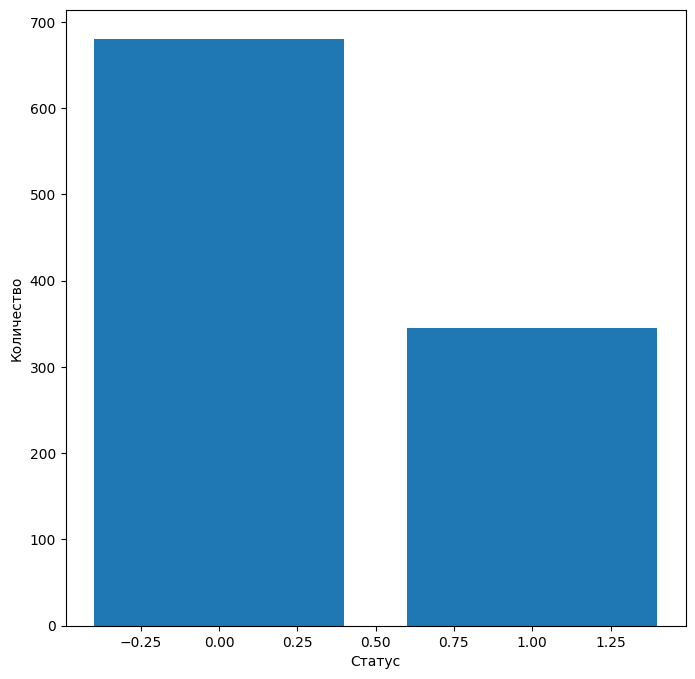

In [9]:
# Барный график

d = df.groupby('exang', sort=True).size().sort_values(ascending = False)
#строим график
plt.figure(figsize=(8,8))
plt.xlabel('Статус')
plt.ylabel('Количество')
plt.bar(d.index, d.values)

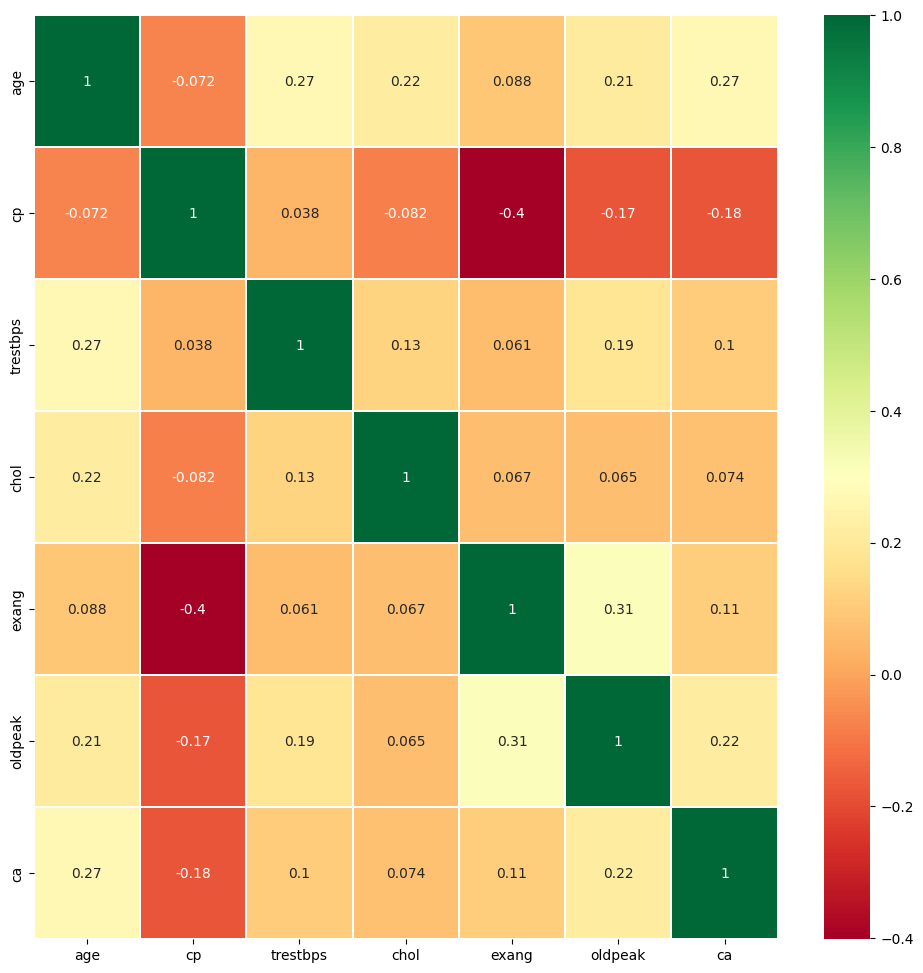

In [10]:
# Матрица корреляций

data = df.iloc[:, [0, 2, 3, 4, 8, 9, 11]]
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

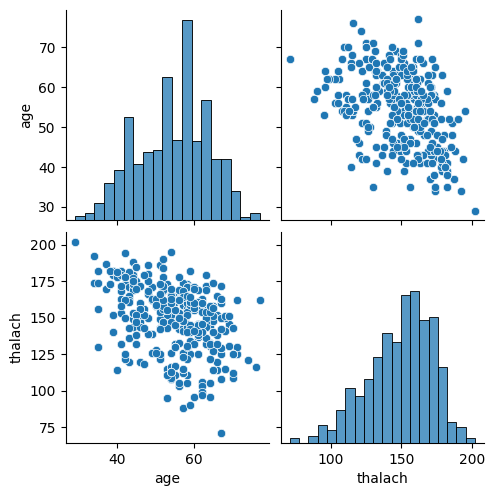

In [11]:
# Парный график

sns_plot = sns.pairplot(df[['age','thalach']])

In [17]:
#sns.heatmap(df[:,[0,13]]) 

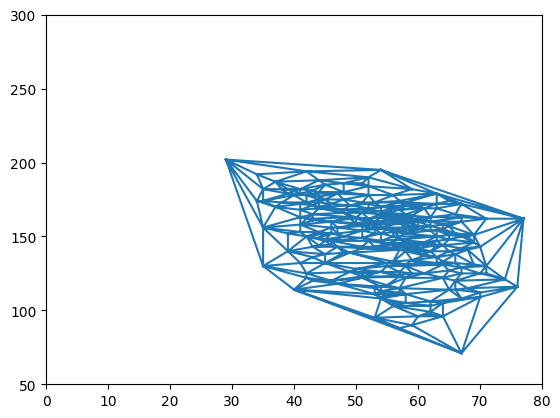

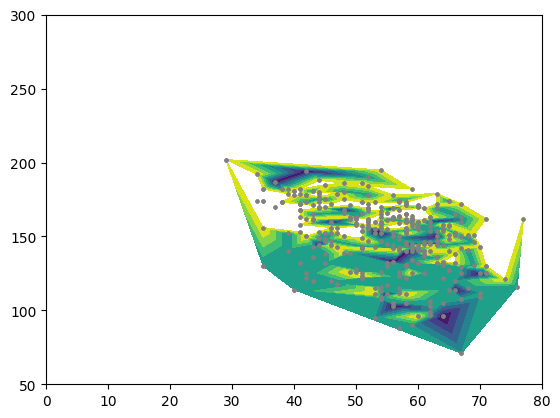

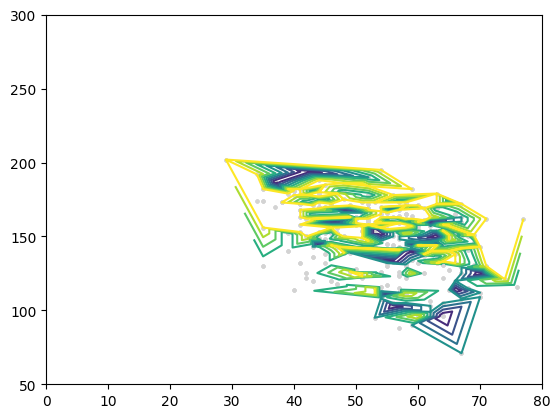

In [12]:
fig, ax = plt.subplots()
ax.triplot(df['age'], df['thalach'])
ax.set(xlim=(0, 80), ylim=(50, 300))
plt.show()

fig, ax = plt.subplots()
ax.plot(df['age'], df['thalach'], 'o', markersize=2, color='grey')
ax.tricontourf(df['age'], df['thalach'], df['slope'])
ax.set(xlim=(0, 80), ylim=(50, 300))
plt.show()

fig, ax = plt.subplots()
ax.plot(df['age'], df['thalach'], 'o', markersize=2, color='lightgrey')
ax.tricontour(df['age'], df['thalach'], df['slope'])
ax.set(xlim=(0, 80), ylim=(50, 300))
plt.show()

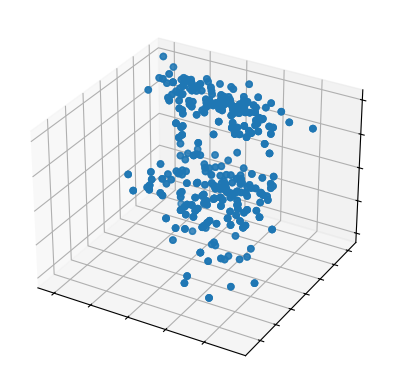

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(df['age'], df['thalach'], df['slope'])
ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
plt.show()